# Анализ датасета "Сокращение сотрудников" (Employee attrition dataset)

Команда: Гречаная Е., Журавлева И., Попова А., Хайруллина К. 

**Сокращение** сотрудников - это снижение численности рабочей силы из-за неизбежных (естественных) факторов, таких как выход на пенсию, отставка, ликвидация должности/департамента, личное здоровье или другие подобные причины. При сокращении, в отличие от увольнения (Turnover), работодатель не будет заполнять вакансию, оставленную бывшим сотрудником.

**Цель проекта** - изучение факторов работы, приводящих к сокращению сотрудников.  
 
**Задачи проекта**:
1. Описание факторов работы, приводящих к сокращению сотрудников (разведочный анализ данных). 
2. Предобработка данных и сокращение количества факторов. 
3. Проведение корреляционного анализа для выявления зависимости между сокращением сотрудников и факторами работы.
4. Построение регрессионной модели для объяснения влияния факторов работы на сокращение сотрудников.
5. Оценка модели регрессионной модели.
6. Описание результатов регрессионной модели.
 
Материалы проекта хранятся на Github - https://github.com/lizagrechanaya/2020_HR_Analytics_Employee_Attrition 

Теория - https://jobzology.com/staff-attrition-vs-staff-turnover-whats-the-difference/

Палитра цветов - https://live.staticflickr.com/7103/7231149854_48e3bb4279_b.jpg

## Библиотеки

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import scipy.stats as ss
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

## Загрузка датасета

***Через директорию в Github***

In [3]:
path = "https://raw.githubusercontent.com/lizagrechanaya/2020_HR_Analytics_Employee_Attrition/master/WA_Fn-UseC_-HR-Employee-Attrition.csv"

df = pd.read_csv(path)

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Описание датасета

В файле датасета "Сокращение сотрудников" хранятся результаты вымышленного опроса IBM HR Analytics Employee Attrition &amp; Performance.

Датасет состоит из 35 переменных.

**Переменные в файле:**

* `Age` – Возраст сотрудника;

* `Attrition` – Факт сокращения (да, нет);

* `BusinessTravel` – Частота командировок (часто, редко, никогда);

* `DailyRate` – Суточная ставка (в условных единицах);

* `Department` – Департамент, где работает сотрудник (продажи, исследования и разработки, УЧР);

* `DistanceFromHome` – Удаленность места работы от дома (в часах);

* `Education` – Уровень образования (1 - школа, 2 - колледж, 3 - бакалавр, 4 - магистр, 5 - доктор наук);

* `EducationField` – Область полученного образования;

* `EmployeeCount` – Подсчет сотрудников (1 у всех);

* `EmployeeNumber` – Порядковый номер сотрудника;

* `EnvironmentSatisfaction` – Удовлетворенность окружающей средой (от 1 - совершенно не удовлетворен, до 4 - полностью удовлетворен);

* `Gender` – Пол сотрудника;

* `HourlyRate` – Почасовая ставка (в условных единицах);

* `JobInvolvement` – Вовлеченность сотрудника (от 1 - совершенно не вовлечен, до 4 - полностью вовлечен);

* `JobLevel` – Уровень позиции сотрудника (от 1 - низшая, до 5 - высшая);

* `JobRole` – Должность сотрудника;

* `JobSatisfaction` – Удовлетворенность работой (от 1 - совершенно не удовлетворен, до 4 - полностью удовлетворен);

* `MaritalStatus` – Семейное положение (одинок, женат/замужем, разведён);

* `MonthlyIncome` – Месячный доход (в условных единицах);

* `MonthlyRate` – Месячная ставка (в условных единицах);

* `NumCompaniesWorked` – Количество компаний, в которых работал сотрудник;

* `Over18` – Факт достижения сотрудником 18 лет ("да" у всех);

* `OverTime` – Факт переработки (да, нет);

* `PercentSalaryHike` – Процент повышения заработной платы;

* `PerformanceRating` – Оценка качества работы сотрудника (содержит только оценки 3 и 4);

* `RelationshipSatisfaction` – Удовлетворенность личными отношениями (от 1 - совершенно не удовлетворен, до 4 - полностью удовлетворен);

* `StandardHours` – Стандартное количество часов работы (80 у всех);

* `StockOptionLevel` – Уровень владения акциями компании;

* `TotalWorkingYears` – Количество отработанных лет;

* `TrainingTimesLastYear` – Количество часов обучения за прошлый год;

* `WorkLifeBalance` – Оценка баланса между работой и личной жизнь (от 1 - отсутствие баланса до 4 - полный баланс);

* `YearsAtCompany` – Количество отработанных лет в текущей компании;

* `YearsInCurrentRole` – Количество отработанных лет в текущей позиции;

* `YearsSinceLastPromotion` – Количество лет с последнего повышения;

* `YearsWithCurrManager` – Количество отработанных лет под руководством текущего менеджера.

**Сокращение факторов**

Мы выбрали наиболее содержательные и интересные для исследования переменные, остальные были исключены.

Список исключенных переменных:

* `DailyRate` – Суточная ставка;

* `DistanceFromHome` – Удаленность места работы от дома;

* `EmployeeCount` – Подсчет сотрудников;

* `EmployeeNumber` – Порядковый номер сотрудника;

* `EnvironmentSatisfaction` – Удовлетворенность окружающей средой;

* `HourlyRate` – Почасовая ставка;

* `MonthlyRate` – Месячная ставка;

* `Over18` – Факт достижения сотрудником 18 лет;

* `PercentSalaryHike` – Процент повышения заработной платы;

* `PerformanceRating` – Оценка качества работы сотрудника;

* `RelationshipSatisfaction` – Удовлетворенность личными отношениями;

* `StandardHours` – Стандартное количество часов работы.

Таким образом, остались 23 переменные.


In [7]:
df = df.drop(['DailyRate', 'DistanceFromHome', 'EmployeeCount','EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 
              'MonthlyRate', 'Over18', 'PercentSalaryHike', 'PerformanceRating', 'StandardHours', 'RelationshipSatisfaction'], axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   Gender                   1470 non-null   object
 7   JobInvolvement           1470 non-null   int64 
 8   JobLevel                 1470 non-null   int64 
 9   JobRole                  1470 non-null   object
 10  JobSatisfaction          1470 non-null   int64 
 11  MaritalStatus            1470 non-null   object
 12  MonthlyIncome            1470 non-null   int64 
 13  NumCompaniesWorked       1470 non-null   int64 
 14  OverTime                 1470 non-null  

## Разведочный анализ данных

## Описательная статистика и визуализация

Text(0.5, 1.0, 'Коэффициент сокращений')

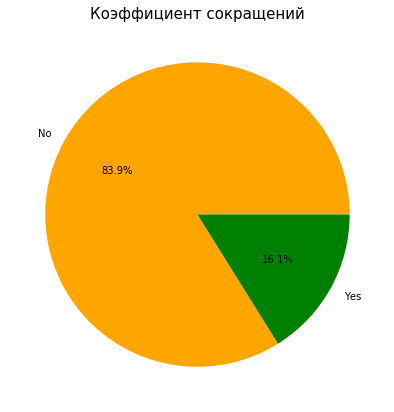

In [10]:
labels = df.Attrition.value_counts().index
colors = ["orange","green"]
sizes = df.Attrition.value_counts().values
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Коэффициент сокращений", color="black", fontsize=15)

**Вывод:** коэффициент сокращений равен 16% - каждый шестой работник был сокращен.

Text(0.5, 1.0, 'Распределение по полу')

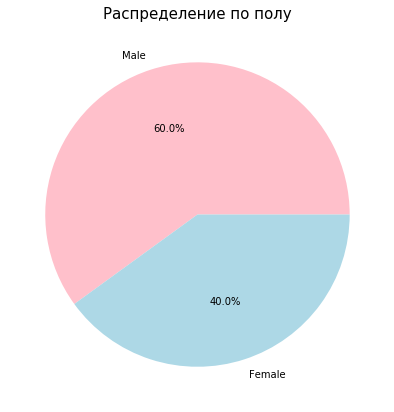

In [55]:
labels = df.Gender.value_counts().index
colors = ["pink","lightblue"]
sizes = df.Gender.value_counts().values
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Распределение по полу", color="black", fontsize=15)

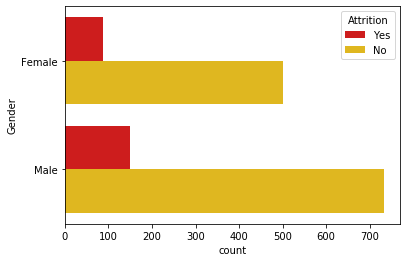

In [54]:
sns.countplot(y='Gender', data=df, hue='Attrition', palette='hot')

**Вывод:** большинство сотрудников - мужчины, женщин на 20% меньше. Среди сокращенных сотрудников эта тенденция сохраняется - мужчин больше.

Минимальный возраст 18 и максимальный 60, средний возраст 36.923809523809524


Text(0, 0.5, 'Вероятность')

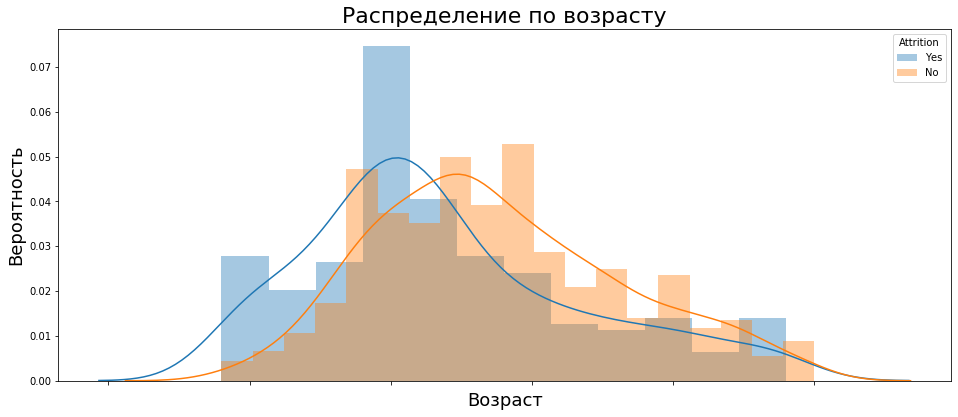

In [16]:
print(f'Минимальный возраст {df["Age"].min()} и максимальный {df["Age"].max()}, средний возраст {df["Age"].mean()}')
plt.figure(figsize=(16,22))

plt.subplot(3,1,1)
g = sns.distplot(df[df['Attrition'] == 'Yes']['Age'], label='Yes')
g = sns.distplot(df[df['Attrition'] == 'No']['Age'], label="No")
g.set_xticklabels(g.get_xticklabels(),rotation=0)
g.legend(title='Attrition')
g.set_title("Распределение по возрасту", fontsize=22)
g.set_xlabel("Возраст", fontsize=18)
g.set_ylabel("Вероятность", fontsize=18)

**Вывод:** распределение сотрудников по возрасту сильно смещено в сторону молодых, категория страшнего поколения почти не представлена, поэтому этот фактор может быть не значим в модели (недостаточно наблюдений о разных категориях для классификации). Учитывая смещение, наибольшее число сокращений приходится на долю молодых специалистов, по мере увеличения возраста доля сокращений снижается.

In [9]:
df.describe()

,Age,Education,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.912925,2.729932,2.063946,2.728571,6502.931293,2.693197,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,1.024165,0.711561,1.106940,1.102846,4707.956783,2.498009,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,5.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Графики распределения значений некоторых переменных в зависимости от наличия или отсутсивия факта сокращения сотрудников


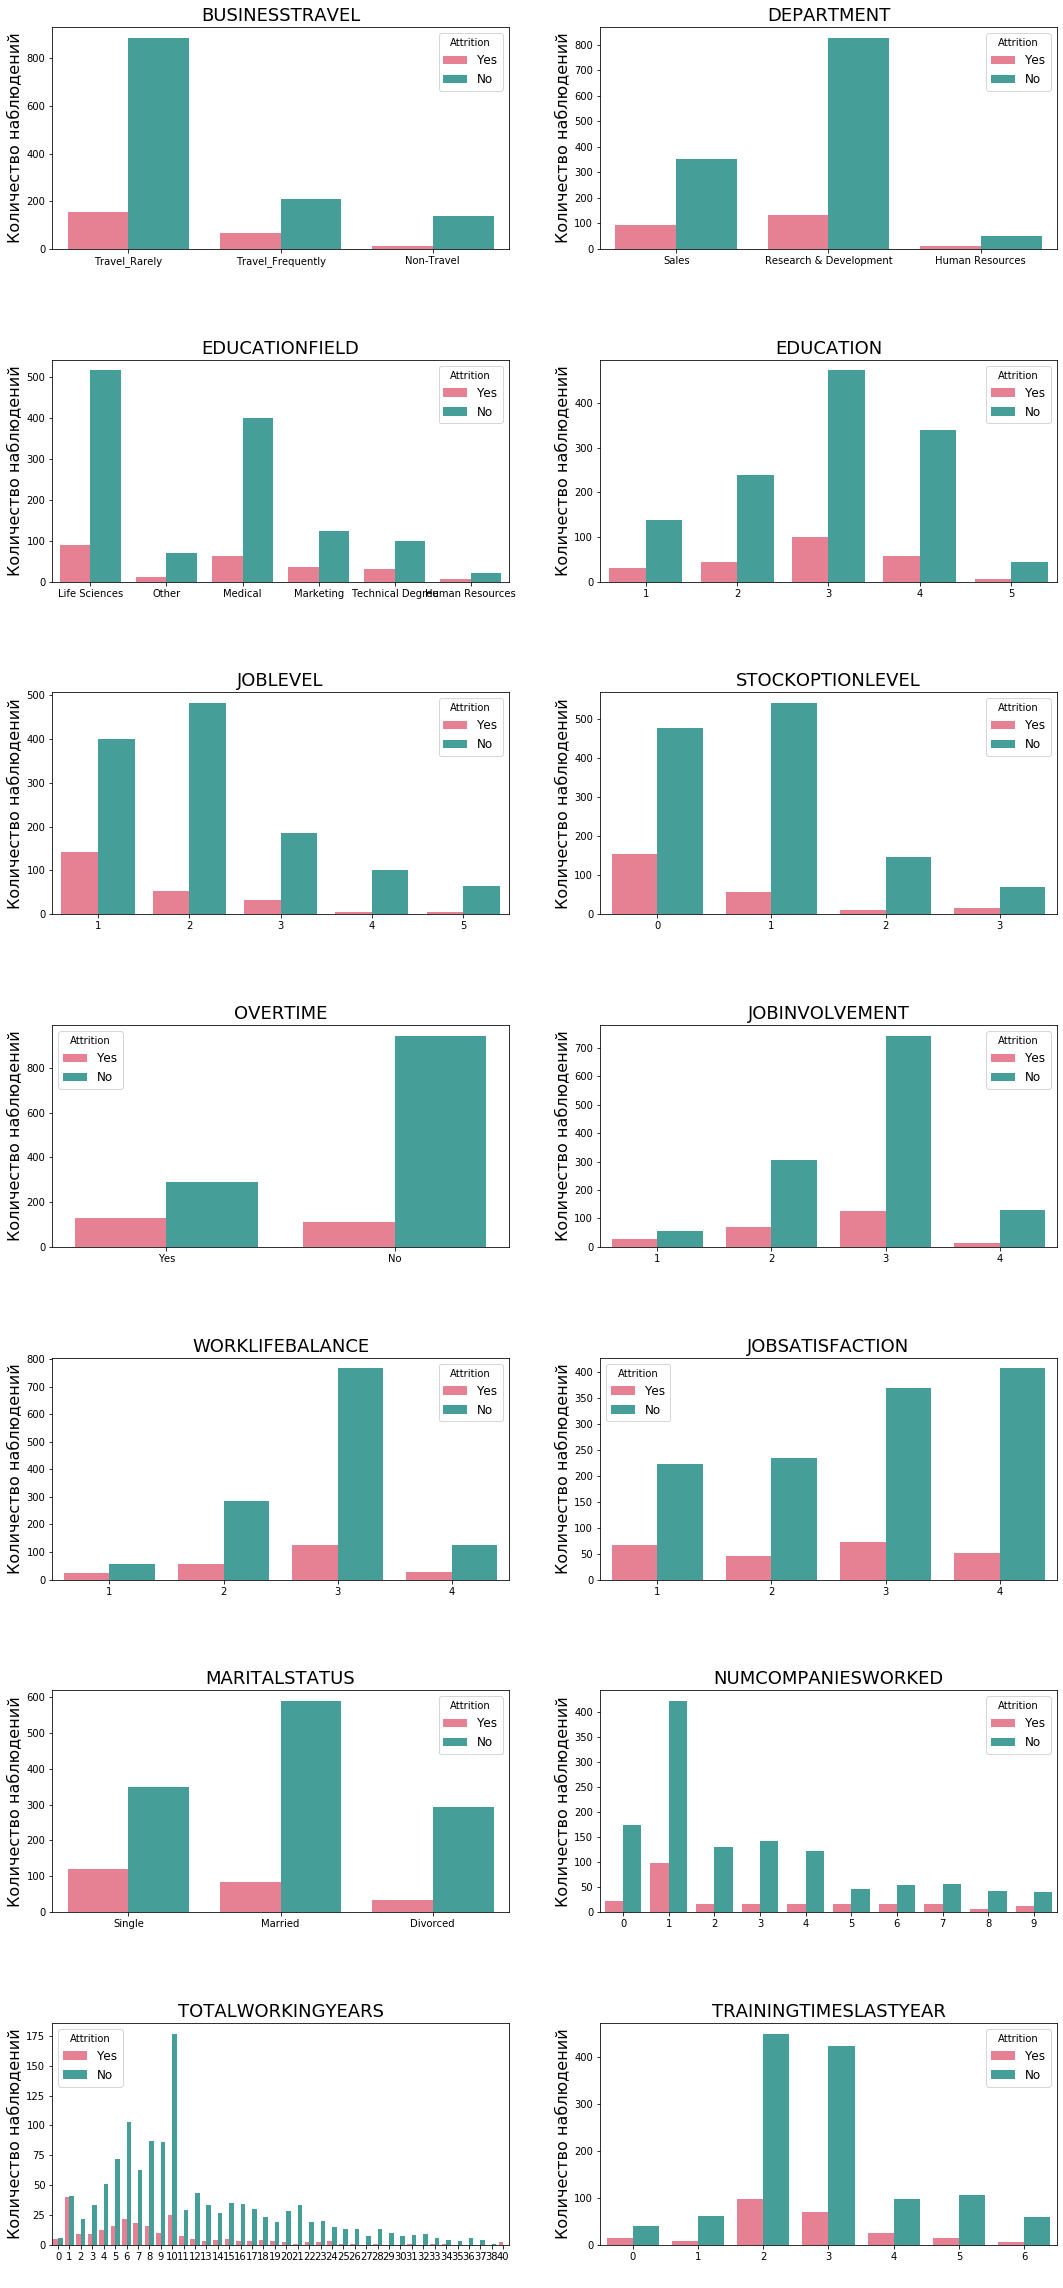

In [59]:
print("Графики распределения значений некоторых переменных в зависимости от наличия или отсутствия факта сокращения сотрудников")

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(18,35))
fig.subplots_adjust(hspace=0.5, bottom=0)

df1 = ['BusinessTravel', 'Department', 'EducationField', 'Education', 'JobLevel', 'StockOptionLevel', 'OverTime', 
       'JobInvolvement', 'WorkLifeBalance', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 
       'TotalWorkingYears', 'TrainingTimesLastYear']

for ax, catplot in zip(axes.flatten(), df1):
        sns.countplot(x=catplot, data=df, hue='Attrition', ax=ax, palette='husl')
        ax.set_title(catplot.upper(), fontsize=18)
        ax.set_ylabel('Количество наблюдений', fontsize=16)
        ax.set_xlabel(' ', fontsize=15)
        ax.legend(title='Attrition', fontsize=12)

**Выводы:**

`BusinessTravel` - наблюдается явное смещение в сторону сотрудников, которые редко ездят в командировки, поэтому доля сокращенных в сравнении по двум группам была бы в этой категории больше, чем в других. Однако, распределение сокращенных и несокращенных сотрудников внутри каждой категории равномерно. Данный показатель не будет оказывать влияние на принятие решения о сокращении/не сокращении сотрудника.

`Department` - большая часть сотрудников относится к отделу R&D, и среди этих же сотрудников наблюдается набольший показатель сокращений. Меньше всего сотрудников представляют отдел HR.

`EducationField` - также, учитывая специфику департаментов мы видим, что у большей части сотрудников образование в области естественных наук (Life Sciences, Medical), затем менеджериальное (Marketing и HR вместе) и техническое. Распределение на сокращенных/несокращенных отвечает общей тенденции.

`Education` - по уровню образования сотрудники в основном имеют степень бакалавров и магистров, хотя доля выпускников колледжей и даже имеющих только школьное образование тоже существенна. Докторов наук немного и их показатель сокращений едва отличим от нуля. Мы видим нормальное распределение, которое, более того, вполне соотносится с реальной жизнью. Скорей всего этот фактор не повлияет на сокращение/не сокращение сотрудника.

`JobLevel` - средний уровень позиции равен второму грейду (низкая позиция) и в основом сотрудники распределеяются по первому и третьему грейду. Можно предположить, что чем ниже грейд, тем выше вероятность попасть под сокращение, так как сокращенных сотрудников на высоких позициях значительно меньше.

`StockOptionLevel` - у всех сотрудников количество акций в среднем составляет одну, а среди сокращенных сотрудников наибольшую долю представляют не владеющие акциями. В связи с этим, выдвигаем гипотезу, что чем меньше количество акций во владении сотрудника, тем выше вероятность его сокращения.

`OverTime` - большая часть сотрудников в компании не перерабатывают, но, сравнивая по группам, заметно, что среди сокращенных сотрудников было больше тех, кто перерабатывал. Можно предположить, что факт переработок увеличивает вероятность сокращения сотрудника (с точки зрения HR, такие сотрудники скорей всего низко производительны, раз не успевают сделать работу в срок, поэтому удерживать их нет смысла).

`JobInvolvement`, `WorkLifeBalance` - вовлеченость в работу и достижение баланса работа-личная жизнь в среднем большинсво сотрудников оценивают на 3 балла из 4, далее преобладают оценки 2 и 4. Распределение сокращенных и несокращенных сотрудников внутри каждой категории повторяет общее распределение, хотя стоит отметить, что по оценке в 1 балл количество сокращенных и несокращенных сотрудников практически равно. Это позволяет выдвинуть гипотезу, что чем выше уровень вовлеченности и достижение баланса, тем ниже шанс попасть под сокращение (с точки зрения HR такие сотрудники более результативны, что приносит прибыль компании).

`JobSatisfaction` - по этому показателю средняя оценка также составляет 3 балла, хотя превалируют наивысшие значения в 4 балла. В целом, сотрудники очень удовлетворены своей работой, а среди тех, кто неудовлетворен можно заметить, что сокращений проходит чуть больше. Гипотеза как и в для факторов выше.

`MaritalStatus` - большая часть сотрудников женаты/замужем, одиноких и разведенных почти попровну. Среди одиноких сотрудников сокращений было больше, чем среди женатых, а для разведенных этот показатель снижается в разы. Содержательно для определение влияния на факт сокращения семейный статус можно было бы анализировать вместе с информацией о наличии/отсутствии детей.

`NumCompaniesWorked` - наблюдается явное смещение в сторону сотрудников с меньшим количеством работодателей, в среднем по всей группе количество компаний составляет 2-3. Количество сокращенных и несокращенных сотрудников в интервале 5-9 компаний начинает равняться, что свидетельствует о том, что чем больше у сотрудника было работодателей, чем выше вероятность его сокращения (с перспективы HR это может означать, что сотрудники склонны часто менять работодателя и будут менее привержены текущей компании).

`TotalWorkingYears` - в среднем сотрудники имеют значительный опыт работы в 10-11 лет. Можно заметить, что с ростом общего стажа работы количество сокращений сходит на "нет", тогда как чем меньше стаж, тем ближе грань сокращен/не сокращен. Кажется, работодатели склонны сокращать молодых сотрудников без опыта работы.

`TrainingTimesLastYear` - у сокращенных сотрудников часов обучения было заметно меньше, чем у тех, кого не сократили. В среднем по всем сотрудникам количество часов обучения составляет около 3 часов. Тенденции по группам повторяют общее распределение, поэтому скложно сказать, будет ли этот фактор значимо оказывать влияние на принятие решения о сокращении/не сокращении сотрудника.

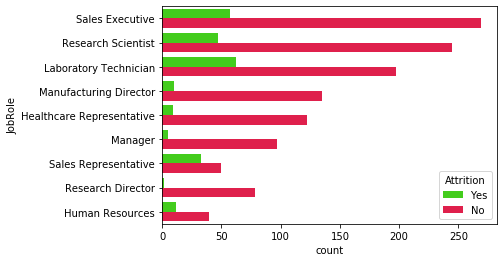

In [17]:
sns.countplot(y='JobRole', data=df, hue='Attrition', palette='prism')

**Вывод:** большая часть сотрудников занимают позиции директоров по продажам, исследователей и лабораторных техников. В виду смещения среди этих сотрудников также чаще встречаются сокращения. Другая категория сотрудников, которых часто сокращают - торговые представители.

Минимальный ежемесячный доход 1009 и максимальный 19999, средний 6502.931292517007


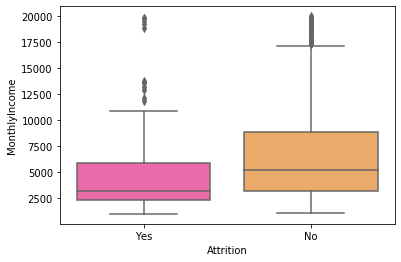

In [42]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette="spring")

print(f'Минимальный ежемесячный доход {df["MonthlyIncome"].min()} и максимальный {df["MonthlyIncome"].max()}, средний {df["MonthlyIncome"].mean()}')

**Вывод:** ежемесячный доход у сокращенных сотрудников меньше среднего дохода по всей группе и особенно меньше, чем у тех, кого не сократили. В основном доход несокращенных сотрудников представлен в значениях третьего и четвёртого квартиля. Исходя из распределения должностей (график выше), можно заключить, что это объясняется преобладанием менеджериальных позиций.

*здесь и далее значение представленно медианой

Минимальное количество лет работы в компании 0 и максимальное 40, среднее 7.0081632653061225


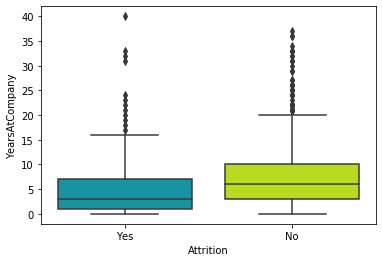

In [44]:
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df, palette="nipy_spectral")

print(f'Минимальное количество лет работы в компании {df["YearsAtCompany"].min()} и максимальное {df["YearsAtCompany"].max()}, среднее {df["YearsAtCompany"].mean()}')

**Вывод:** несокращенные сотрудники работали в текущей компании большее количество лет, чем те, кого сократили - мы можем наблюдать, что максимальное количество лет у сокращенных сотрудников равно средней несокращенных. В основном количество лет работы несокращенных сотрудников представлено в значениях третьего и четвёртого квартиля.
Можно предоложить, что чем меньше сотрудник работает в компании, тем выше вероятность его сокращения. С перспективы HR это может означать, что сотрудники с меньшим стажем также менее лояльны к компании, поэтому могут быть менее ценными.

Минимальное количество лет с последнего продвижения 0 и максимальное 15, среднее 2.1877551020408164


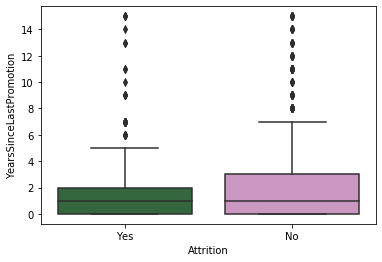

In [46]:
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=df, palette="cubehelix")

print(f'Минимальное количество лет с последнего продвижения {df["YearsSinceLastPromotion"].min()} и максимальное {df["YearsSinceLastPromotion"].max()}, среднее {df["YearsSinceLastPromotion"].mean()}')

**Вывод:** количество лет с последнего повышения у обеих групп одинаково, хотя несокращенные сотрудники в среднем могут ждать продвижения дольше. Выглядт так, будто чем реже сотрудника повышают, тем ниже вероятность его сокращения. С перспективы HR это может означать, что сотрудник после повышения показывает результаты хуже, чем до, поэтому лучше его не повышать.

Text(0, 0.5, 'Вероятность')

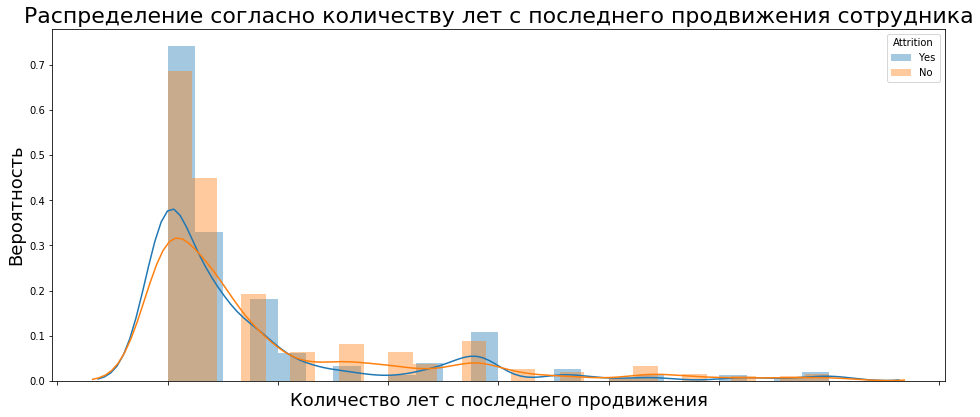

In [5]:
plt.figure(figsize=(16,22))

plt.subplot(3,1,1)
g = sns.distplot(df[df['Attrition'] == 'Yes']['YearsSinceLastPromotion'], label='Yes')
g = sns.distplot(df[df['Attrition'] == 'No']['YearsSinceLastPromotion'], label="No")
g.set_xticklabels(g.get_xticklabels(),rotation=0)
g.legend(title='Attrition')
g.set_title("Распределение согласно количеству лет с последнего продвижения сотрудника", fontsize=22)
g.set_xlabel("Количество лет с последнего продвижения", fontsize=18)
g.set_ylabel("Вероятность", fontsize=18)

Минимальное количество лет работы в текущей должности 0 и максимальное 18, среднее 4.229251700680272


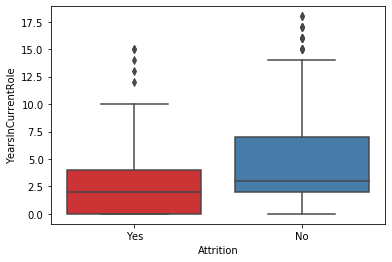

In [47]:
sns.boxplot(x = 'Attrition', y='YearsInCurrentRole', data=df, palette="Set1")

print(f'Минимальное количество лет работы в текущей должности {df["YearsInCurrentRole"].min()} и максимальное {df["YearsInCurrentRole"].max()}, среднее {df["YearsInCurrentRole"].mean()}')

**Вывод:** количество отработанных лет на текущей позиции в среднем выше среди несокращенных сотрудников. Более того, в большинстве случаев чаще сокращали тех, у кого минимальное количество отработанных лет было меньше 2,5. Исходя из чего, можно предположить, что чем дольше сотрудник работает в компании, тем меньше вероятность его сокращения. С перспективы HR это может означать, что сотрудники с большим стажем будут ценными, так как их накопленный опыт помогает работать результативнее и эффективнее, что приносит прибыль компании.

Минимальное количество лет работы с текущим руководителем 0 и максимальное 17, среднее 4.12312925170068


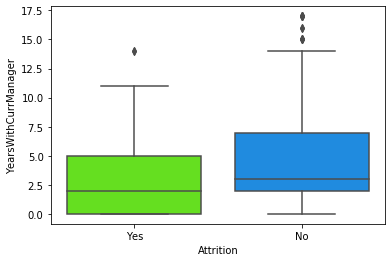

In [57]:
sns.boxplot(x = 'Attrition', y='YearsWithCurrManager', data=df, palette="gist_rainbow")

print(f'Минимальное количество лет работы с текущим руководителем {df["YearsWithCurrManager"].min()} и максимальное {df["YearsWithCurrManager"].max()}, среднее {df["YearsWithCurrManager"].mean()}')

**Вывод:** у сокращенных сотрудников количество отработанных лет под руководством текущего менеджера было меньше, чем у тех, кого не сократили. Минимальный порог для несокращенных сотрудников находится на уровне среднего значения сокращенных, а максимум находится в районе четвертого квартиля.

**Сокращение факторов**

С точки зрения законодательства (https://assistentus.ru/sotrudniki/uvolnenie-po-sokrashcheniyu-shtata/) и практического опыта следующие факторы не могут и не должны оказывать влияние на сокращение сотрудников:


* `BusinessTravel`, `Gender`, `MaritalStatus`, `MonthlyIncome`, `EducationField` - не являются критериями для сокращения;

* `Department`, `JobRole`  – это частные факторы для увольнения, перед организацией должны стоять цели ликвидации определенных профильных единиц.

Таким образом, осталось 16 переменных.

In [17]:
df = df.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 
              'MonthlyIncome'], axis = 1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Education                1470 non-null   int64 
 3   JobInvolvement           1470 non-null   int64 
 4   JobLevel                 1470 non-null   int64 
 5   JobSatisfaction          1470 non-null   int64 
 6   NumCompaniesWorked       1470 non-null   int64 
 7   OverTime                 1470 non-null   object
 8   StockOptionLevel         1470 non-null   int64 
 9   TotalWorkingYears        1470 non-null   int64 
 10  TrainingTimesLastYear    1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
 13  YearsInCurrentRole       1470 non-null   int64 
 14  YearsSinceLastPromotion  1470 non-null  

## Предобработка данных

**Проверка пропущенных значений**

In [10]:
df.isnull().values.any()

False

**Кодирование переменных**

In [19]:
cat_vars=['Attrition', 'OverTime']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1
    
cat_vars=['Attrition', 'OverTime']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

df=df[to_keep]
df.columns.values

array(['Age', 'Education', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_No', 'Attrition_Yes',
       'OverTime_No', 'OverTime_Yes'], dtype=object)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   Education                1470 non-null   int64
 2   JobInvolvement           1470 non-null   int64
 3   JobLevel                 1470 non-null   int64
 4   JobSatisfaction          1470 non-null   int64
 5   NumCompaniesWorked       1470 non-null   int64
 6   StockOptionLevel         1470 non-null   int64
 7   TotalWorkingYears        1470 non-null   int64
 8   TrainingTimesLastYear    1470 non-null   int64
 9   WorkLifeBalance          1470 non-null   int64
 10  YearsAtCompany           1470 non-null   int64
 11  YearsInCurrentRole       1470 non-null   int64
 12  YearsSinceLastPromotion  1470 non-null   int64
 13  YearsWithCurrManager     1470 non-null   int64
 14  Attrition_No             1470 non-null   uint8
 15  Attr

**Сокращение числа факторов**

In [21]:
df = df.drop(['OverTime_No', 'Attrition_No'], axis = 1) 

После кодирования и сокращения осталось 16 переменных.

## Корреляционный анализ

Коэффициент корреляции Кендалла - подходит для ранговых переменных, принимает значения от -1 до 1. Попробуем применить его к нашему датасету, где есть две категориальные переменные.

In [24]:
df.corr(method = "kendall") 

,Age,Education,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,OverTime_Yes
Age,1.000000,0.156359,0.027155,0.390040,-0.003919,0.255092,0.043757,0.502030,0.000384,-0.003008,0.186919,0.145581,0.129532,0.143702,-0.142012,0.022431
Education,0.156359,1.000000,0.032382,0.090791,-0.004297,0.109388,0.011919,0.124397,-0.019867,0.015029,0.049947,0.043307,0.026344,0.040659,-0.027817,-0.015586
JobInvolvement,0.027155,0.032382,1.000000,-0.016119,-0.010565,0.012770,0.031196,0.004915,0.001726,-0.017832,0.010814,0.012845,-0.007127,0.031121,-0.113526,-0.001773
JobLevel,0.390040,0.090791,-0.016119,1.000000,-0.000656,0.144593,0.040988,0.615243,-0.016511,0.035463,0.387734,0.321828,0.223978,0.305682,-0.175770,-0.000364
JobSatisfaction,-0.003919,-0.004297,-0.010565,-0.000656,1.000000,-0.041406,0.011054,-0.012072,-0.009854,-0.025956,0.009456,0.000422,0.006163,-0.013348,-0.094305,0.026127
NumCompaniesWorked,0.255092,0.109388,0.012770,0.144593,-0.041406,1.000000,0.026936,0.227396,-0.038023,0.007869,-0.126595,-0.095551,-0.052294,-0.108947,0.026854,-0.010344
StockOptionLevel,0.043757,0.011919,0.031196,0.040988,0.011054,0.026936,1.000000,0.040890,0.002946,-0.014713,0.051698,0.058767,0.023189,0.043796,-0.162844,-0.007906
TotalWorkingYears,0.502030,0.124397,0.004915,0.615243,-0.012072,0.227396,0.040890,1.000000,-0.010646,0.002297,0.500222,0.395843,0.255244,0.396476,-0.166781,0.000215
TrainingTimesLastYear,0.000384,-0.019867,0.001726,-0.016511,-0.009854,-0.038023,0.002946,-0.010646,1.000000,0.020482,0.001368,0.003600,0.008217,-0.009156,-0.047154,-0.064468
WorkLifeBalance,-0.003008,0.015029,-0.017832,0.035463,-0.025956,0.007869,-0.014713,0.002297,0.020482,1.000000,0.003760,0.019052,0.001841,-0.003933,-0.049365,-0.028669


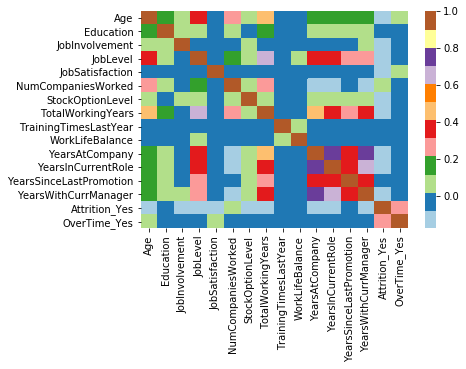

In [25]:
sns.heatmap(df.corr(method = "kendall"), cmap = 'Paired')

**Вывод**: сильная связь (приблизительно 0.8) наблюдается у переменных, характеризующих количество отработанных лет в текущей компании, на текущей позиции и под руководством текущего менеджера. Все связи положительны, что означает прямую зависимость: повышение одного показателя приведёт к повышению другого показателя - с точки зрения опыта всё логично. Тем не менее выявленные связи не несут особой смысловой нагрузки для проводимого анализа, так как они не связаны с фактом сокращения. 

**Коэффициент корреляции Крамера** - подходит для категориальных переменых, поэтому используем его отдельно для анализа двух категориальных переменных (это более статистически верный вариант, в отличие от Кендалла). 

Коэффициент корреляции Крамера принимает значения от 0 до 1.

In [26]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [27]:
cramers_v(df['Attrition_Yes'], df['OverTime_Yes'])

0.24274868721401766

In [28]:
x = df['Attrition_Yes']
y = df['OverTime_Yes']
x.corr(y, method = "kendall") 

0.24611799424580433

In [29]:
ss.kendalltau(x, y)

KendalltauResult(correlation=0.24611799424580433, pvalue=3.981586606654432e-21)

**Выводы:** 
1. Значения коэффициентов корреляции Кендалла и Крамера похожи, поэтому можно использовать первый коэффициент и для анализа категориальных переменных. 
2. Коэффициент корреляции очень низкий, переменные "Сокращение" и "Переработки" практически не взаимосвязаны. Достоверность этого фактора подтверждает p-value < 0.5, однако, это содержательно бесполезный вывод.
3. В целом, поиск корреляций для нашего датасета - бесполезная процедура, так как, во-первых, **корреляцию между категориальными и числовыми переменными не имеет смысла делать** даже по Кендаллу, во-вторых, полученные коэффициенты непоказательны, они все говорят о низкой взаимосвязи. Предполагается, что на основании корреляционного анализа мы отбираем переменные для модели, но тогда бы у нас не осталось никаких переменных, связанных с фактом сокращения сотрудников.

О применимости различных коэффициентов и целесообразности корреляционного анализа для дасасета с категориальными и числовами переменными --> https://ru.coursera.org/lecture/stats-for-data-analysis/korrieliatsiia-met-iusa-i-koeffitsiient-kramiera-prX3S

## Регрессионная модель и её оценка

In [30]:
X = df.drop(['Attrition_Yes'], axis = 1)
y = df['Attrition_Yes']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Attrition_Yes   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1455
Method:                           MLE   Df Model:                           14
Date:                Thu, 04 Jun 2020   Pseudo R-squ.:                     inf
Time:                        15:56:44   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                        -0.0067      0.011     -0.639      0.523      -0.027       0

C:\Users\lizag\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning:

overflow encountered in exp

C:\Users\lizag\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1800: RuntimeWarning:

divide by zero encountered in log

C:\Users\lizag\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\lizag\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



In [31]:
y_pred = result.predict(X)

from sklearn.metrics import roc_auc_score
y_pred = np.array(y_pred)
pred = np.array(df.Attrition_Yes)
roc_auc_score(df.Attrition_Yes, y_pred)

0.8016603871727219

Мы выбрали в качестве параметра оценки модели площадь под ROC-кривой **AUC** (Area Under Curve), так как она наиболее просто в понимании и интерпретации.
**AUC** является агрегированной характеристикой качества классификации, не зависящей от соотношения цен ошибок. Чем больше значение AUC, тем «лучше» модель классификации. Например, AUC = 0.7 можно интерпретировать как вероятность 70%, что модели удастся разделить классы. Если AUC = 0.5, соответствующая модель станет бесполезной в том смысле, что она будет работать не лучше классификатора, который присваивает классы случайным образом (путем простого угадывания). Дальнейшему уменьшению параметра AUC будут соответствовать классификаторы, работающие хуже случайного, кода вероятность неправильной классификации выше, чем вероятность правильной.
Параметр AUC часто используется для сравнительного анализа нескольких моделей классификации, поэтому далее мы попытаемся улучшить качество модели, исключив незначимые факторы с помощью "ручной" пошаговой регресии (Stepwise regression).

In [32]:
X = df.drop(['Attrition_Yes'], axis = 1)
y = df['Attrition_Yes']

logit_model=sm.Logit(y,X)
result=logit_model.fit()

p= list(result.pvalues)
name = list(X.columns)

steps = pd.DataFrame(list(zip(name, p)), columns =['Name', 'pval']) 
steps_sort = steps[(steps.pval > 0.05)]
list(steps_sort['Name'])

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\lizag\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning:

overflow encountered in exp

C:\Users\lizag\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1800: RuntimeWarning:

divide by zero encountered in log



['Age', 'Education', 'JobLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']

In [33]:
df = df.drop(['Age', 'Education', 'JobLevel', 'TrainingTimesLastYear', 'WorkLifeBalance'], axis = 1)

In [34]:
X = df.drop(['Attrition_Yes'], axis = 1)
y = df['Attrition_Yes']

logit_model=sm.Logit(y,X)
result=logit_model.fit()

p= list(result.pvalues)
name = list(X.columns)

steps = pd.DataFrame(list(zip(name, p)), columns =['Name', 'pval']) 
steps_sort = steps[(steps.pval > 0.05)]
list(steps_sort['Name'])

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


[]

**Мы нашли наилучшие факторы для модели на предыдущем шаге.**

In [35]:
X = df.drop(['Attrition_Yes'], axis = 1)
y = df['Attrition_Yes']

logit_model=sm.Logit(y,X)
result=logit_model.fit()

y_pred = result.predict(X)

y_pred = np.array(y_pred)
pred = np.array(df.Attrition_Yes)
AUC = roc_auc_score(df.Attrition_Yes, y_pred)
print(AUC)

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
0.7991075247843242


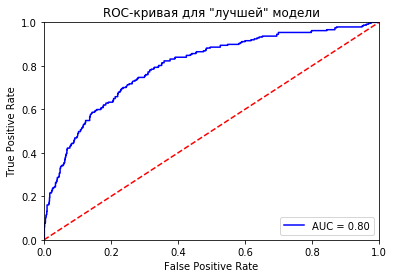

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('ROC-кривая для "лучшей" модели')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Вывод:** качество финальной модели по параметру AUC не просело - с вероятностью 80% мы можем утверждать, что модели удаётся правильно предсказывать факт сокращения сотрудника и то, какие факторы на это влияют.

## Описание результатов регрессионной модели

In [37]:
X = df.drop(['Attrition_Yes'], axis = 1)
y = df['Attrition_Yes']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Attrition_Yes   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1460
Method:                           MLE   Df Model:                            9
Date:                Thu, 04 Jun 2020   Pseudo R-squ.:                     inf
Time:                        15:57:48   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
JobInvolvement             -0.2824      0.074     -3.838      0.000      -0.427      -0

C:\Users\lizag\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning:

overflow encountered in exp

C:\Users\lizag\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1800: RuntimeWarning:

divide by zero encountered in log

C:\Users\lizag\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\lizag\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



In [39]:
# так как логистическая регрессия показывает отношение шансов, для более содержательной интерпретации мы собираемся 
# использовать значение экспоненты, показывающий количество раз увеличения/снижения вероятности попасть под сокращение

values = np.exp(result.params.values)
names = X.columns
p = list(result.pvalues)

for i, j, e in zip(names, values, p):
    print(i,j, e)

JobInvolvement 0.7539437942647567 0.00012387911702133321
JobSatisfaction 0.8064286521612115 0.00047434126300878975
NumCompaniesWorked 1.158273904938633 5.700647171328303e-06
StockOptionLevel 0.6158596957543047 2.694447598978325e-06
TotalWorkingYears 0.9034838458288184 4.858010262181536e-08
YearsAtCompany 1.0671872241355527 0.049894838661191966
YearsInCurrentRole 0.8897706282303813 0.003360611892907628
YearsSinceLastPromotion 1.1360879723877597 0.0004948858459222577
YearsWithCurrManager 0.9221026252819392 0.04472730039902053
OverTime_Yes 4.894403704574905 4.110777239520997e-23


**Выводы:** 

Факторы вовлеченность, удовлетворенность работой, наличие во владении акций компании, общий стаж работы, количество лет работы на текущей позиции и с текущим менеджером отрицательно связаны с сокращением. Другими словами, эти факторы, как и ожидалось, снижают вероятность попасть под сокращение. Наиболее сильные факторы среди всех - общий стаж работы и количество лет работы с текущим менеджером.
Следующие гипотезы были подтверждены:

`JobInvolvement`, `JobSatisfaction` - чем выше уровень вовлеченности и удовлетровенности, тем ниже шанс попасть под сокращение. С точки зрения HR такие сотрудники более результативны, что приносит прибыль компании.

`StockOptionLevel` - чем меньше количество акций во владении сотрудника, тем выше вероятность его сокращения.

`TotalWorkingYears` - чем больше общий стаж, тем меньше вероятность быть сокращенным. Кажется, работодатели склонны сокращать молодых сотрудников без опыта работы.

`YearsInCurrentRole` - чем дольше сотрудник занимает свою позицию, тем меньше вероятность его сокращения. С перспективы HR это может означать, что сотрудники с большим стажем по функционалу конкретной должности будут ценными, так как их накопленный опыт помогает работать результативнее и эффективнее, что приносит прибыль компании.

`YearsWithCurrManager` - руководитель будет отстаивать своих наиболее ценных сотрудников, поэтому тех, кто работает под руководством текущего менеджера долго, сокращают реже.

Также на этапе разведочного анализа уже видели высокую положительную корреляцию между переменными количество лет на текущей позиции и с текущим менеджером, что объясняет их синергетический эффект.


Факторы количество компаний, в которых работал сотрудник, общее количество лет работы в текущей компании, количество лет с последнего повышения и факт наличия переработок положительно связаны с сокращением. Другими словами, эти факторы повышают вероятность попасть под сокращение. Все эти факторы в равной степени оказывают сильное влияние, однако особенно выделяется факт наличие у сотрудника переработок - он в пять раз повышает вероятность попасть под сокращение. С точки зрения HR, такие сотрудники скорей всего низко производительны, раз не успевают сделать работу в срок, поэтому удерживать их нет смысла.
Результаты подвердили следующие гипотезы:
    
`NumCompaniesWorked` - чем больше у сотрудника было работодателей, чем выше вероятность его сокращения (с перспективы HR это может означать, что сотрудники склонны часто менять работодателя и будут менее привержены текущей компании).

`YearsAtCompany` - чем меньше сотрудник работает в компании, тем выше вероятность его сокращения. С перспективы HR это может означать, что сотрудники с меньшим стажем также менее лояльны к компании, поэтому могут быть менее ценными.
При этом стоит отметить, что количество лет работы в компании сильно и положительно связаны (по коэффициенту корреляции кендалла) с переменными количество лет на текущей позиции и с текущим менеджером, однако общего синергетического эффекта у них нет - возможно, что такой сотрудник часто меняет или позицию, или руководителя.

`YearsSinceLastPromotion` - эффект обратен фактору количество лет работы на текущей позиции: чем реже сотрудника повышают, тем ниже вероятность его сокращения. С перспективы HR это выглядит так, будто сотрудник после повышения показывает результаты хуже, чем до, поэтому лучше его не повышать - возможно, речь идёт о директорах по продажам, среди которых проводилось много сокращений.

**Выводы по проекту:**
    
Мы проанализировали датасет "Сокращение сотрудников" и достигли цели исследования - изучили факторы работы, приводящие к сокращению сотрудников. Были выполнены все задачи проекта, а именно: проведён разведочный анализ данных, часть неподходящих переменных сокращена, категориальные переменные перекодированы в дамми, визуализированы связи в виде корреляционной матрицы, построена модель логистической регрессии и проведена её оценка. 

Основные эмпирические выводы полностью согласуются с нашими теоретическими познаниями и опытом в управлении персоналом – чем лояльнее сотрудник, чем дольше и успешнее он работает в компании, тем меньше вероятность для него попасть под сокращение. Сокращение скорее коснется сотрудников, которые часто перерабатывают, часто меняют место работы (у них нет устявшихся связей и опыта), и тех, кто после повышения, скорей всего, не справляется со своими обязанностями (или им не повезло и именно их структурную единицу компания решила сократить).   

*Примечание: мы пробовали вставить анимированную визуализацию, однако этот файл был, видимо, слишком перегружен. Очень красивая и "живая" визуализация находится в файле Plotly graphics.*